In [1]:
#Myan Sudharsanan, Jeremy Staiva, Reedham Kalariya
#Final Project Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
df = pd.read_csv('./winequality-red.csv', sep=';')


df=df.drop(columns=['pH','sulphates','density'])

scaler = StandardScaler()

#df=pd.DataFrame(scaler.fit_transform(df))



df

#how many instances within quality 5 or quality 6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,10.2,5


In [4]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

clf_space = dict()

# clf_space['n_estimators'] = [100, 150, 200, 250]

# clf_space['criterion'] = ['gini', 'entropy', 'log_loss']

# clf_space['max_depth'] = [9, 10, 11, 12, 13, 14, 15]

# clf_space['max_features'] = ['sqrt', 'log2', None]

# clf_space['class_weight'] = ['balanced', 'balanced_subsample']

#pca = PCA(n_components=3)

#X_reduced = pca.fit_transform(X)

#feature_importances = pca.components_.T
#important_features = np.argsort(np.abs(feature_importances), axis=0)[-2:]
#important_features = important_features[::-1]

#X_new = X[:, important_features.ravel()[:][1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train and evaluate your model


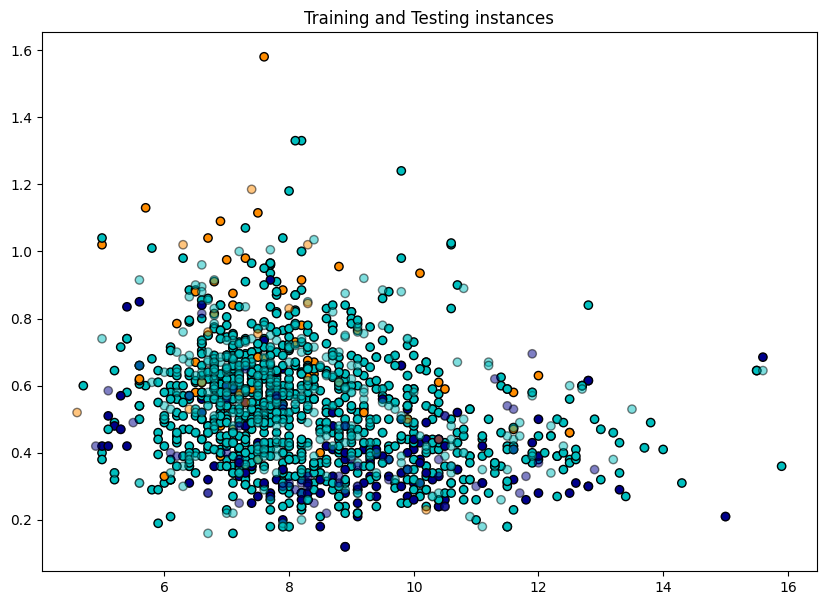

In [5]:
import matplotlib.colors as colr
figr = plt.figure(figsize = (10,7))
cmap_bold = colr.ListedColormap(['darkorange', 'c', 'darkblue'])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_bold, alpha=0.5, edgecolor='k')
plt.title('Training and Testing instances')
plt.show()

In [5]:
clf = RandomForestClassifier()

# pipeline = Pipeline([
#     ('scaler', scaler),
#     ('classifier', clf)
# ])
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",RandomForestClassifier())])

param_grid = {
#     'rf__max_depth': [4, 5, 10],
#     'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
#     'rf__n_estimators': [100, 200, 300]
    
    
    'rf__n_estimators' : [100, 150, 200, 250],

    'rf__criterion' : ['gini', 'entropy', 'log_loss'],

    'rf__max_depth' : [9, 10, 11, 12, 13, 14, 15],

    'rf__max_features' : ['sqrt', 'log2', None],

    'rf__class_weight' : ['balanced', 'balanced_subsample']
}


search = GridSearchCV(pipeline, param_grid,cv=5)

#clf.fit(X_train, y_train)

#clf.score(X_test, y_test)

#y_pred=clf.predict(X_test)

#mean_squared_error(y_pred, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
result = search.fit(X_train, y_train)

#clf.score(X_test, y_test)

In [24]:
accuracy_score(y_test, search.predict(X_test))

0.9041666666666667

/var/folders/s_/r348h2g92mj0mdlnx4tzky600000gn/T/ipykernel_54993/184943743.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


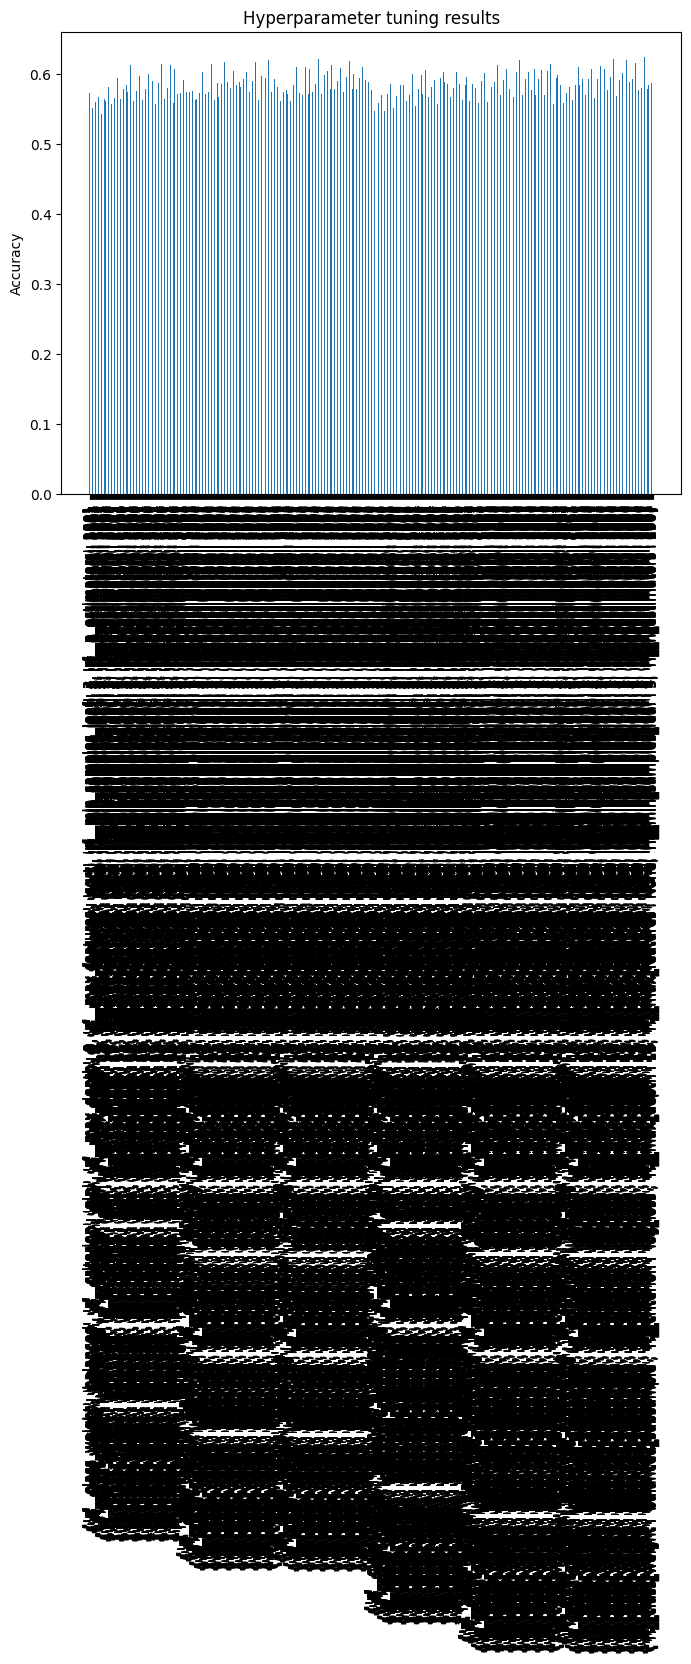

In [22]:
# Extract the scores and hyperparameters
scores = result.cv_results_['mean_test_score']
params = result.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

# PCA
Define a pipeline to search for the best combination of PCA truncation
and classifier regularization.
pca = PCA()
set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [ ]:
#We considered PCA for a moment too but since it is an unsupervised techqniue for feaature extraction, we thought it would not be helpful unless
#we find any strong correlation between other features or inter-correlation. This is just our reference code on how to pipeline our standardization
# of the data and run the data through the model for hyperparamterization, particulary with Cross-Validation to avoid overfitting of data into 
# the model as much as possible.

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
# pca = PCA()
# set the tolerance to a large value to make the example faster
# logistic = LogisticRegression(max_iter=10000, tol=0.1)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# KNN

Knn algorithm and plots

In [36]:
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("knn",KNeighborsClassifier())])

knn_param_grid = {
    'knn__n_neighbors' : [4,5,6,7,8,9],
    'knn__weights' : ['uniform','distance'],
    'knn__algorithm' : ['auto','ball_tree','kd_tree','brute']
}

knn = GridSearchCV(pipeline, knn_param_grid,cv=5)

results = knn.fit(X_train, y_train)


In [37]:
accuracy_score(y_test, knn.predict(X_test))

0.6270833333333333

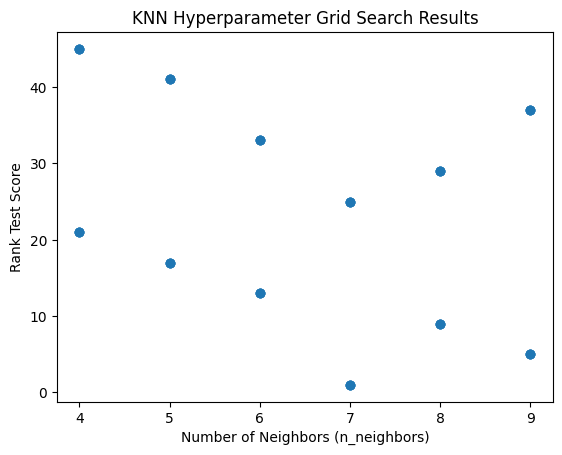

In [39]:
results = knn.cv_results_

# Extract the values of n_neighbors and rank_test_score from the results
n_neighbors = [params['knn__n_neighbors'] for params in results['params']]
rank_test_score = results['rank_test_score']

# Create a scatter plot of rank_test_score vs n_neighbors
plt.scatter(n_neighbors, rank_test_score)

# Add labels to the plot
plt.title("KNN Hyperparameter Grid Search Results")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Rank Test Score")

# Show the plot
plt.show()

/var/folders/s_/r348h2g92mj0mdlnx4tzky600000gn/T/ipykernel_54993/663217546.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


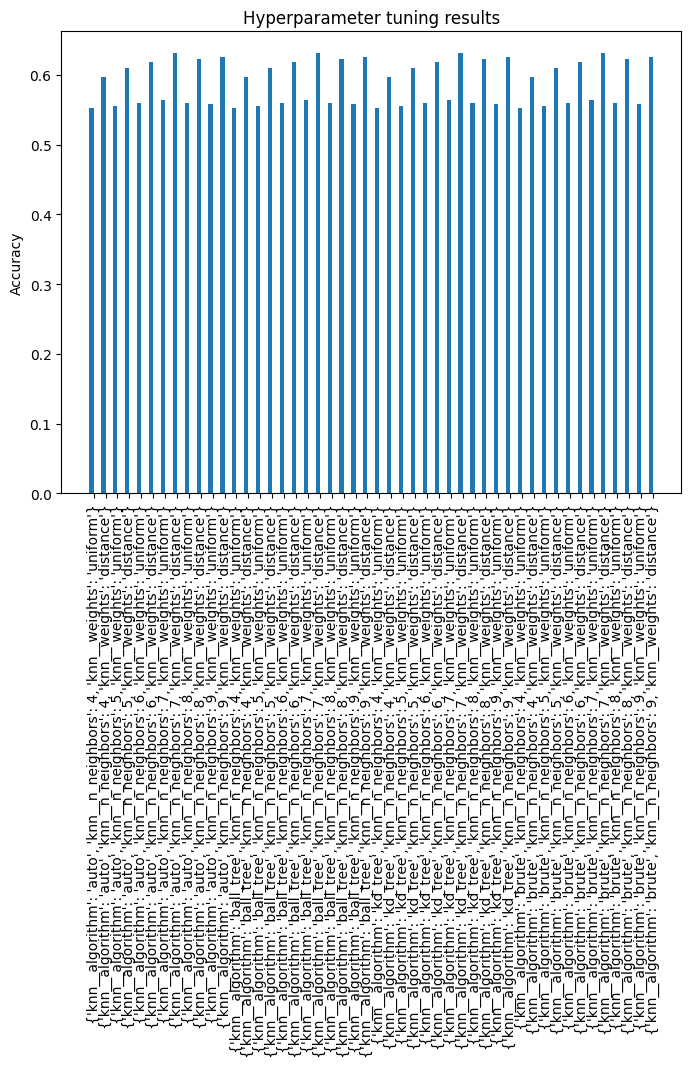

In [38]:
# Extract the scores and hyperparameters
scores = knn.cv_results_['mean_test_score']
params = knn.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

# ANN

ANN model made with MLP library rejected due to high inaccuracy 

In [48]:
#We also ran an Artificial Neural Network (ANN) using the Multi-Layer Perceptron Model libraries (MLPClassifier) in sklearn. We found that the 
# accuracy of classification of the model on the wine dataset never exceeds 65-67% with the data manipulation methods and hyperparameter tuning we 
# are doing with the allowed libraries (sklearn and other supporting python libraries). Since this result of ANN is very unsatisfactory, we have
# decided to not use it as our reporting classification model. However, we have provided the code as an appendix to the report to show our efforts
# in finding the classification model best suited based on accuracy for the given UCI wine dataset.
scores=[]

#standardize

layers=list(range(5,300, 5))

for i in layers:
    

    mlp=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(i,), alpha=1e-2, max_iter = 400, learning_rate_init = 0.1).fit(X, y)
    
    y_pred=mlp.predict(X_test)
    scores.append(mlp.score(X_test, y_test))
    #scores.append(mean_squared_error(y_pred, y_test))


# Define the ANN model with default parameters
ann_model = MLPClassifier()

# Define the hyperparameters and their possible values for the Random Forest Classifier

mlp_hyperparameters = {
    # 'n_estimators': [100, 500, 1000],
    # 'max_depth': [5, 10, 15, 20],
    # 'max_features': ['sqrt', 'log2'],
    # 'bootstrap': [True, False],

    'hidden_layer_sizes' : [(50,),(20,),(100,),(200,),(500,),(1000,)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':[0.000005,0.00001,0.0003,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.03],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.0001,0.0002,0.0005,0.003,0.001,0.002,0.005,0.01]

}


# Define the RandomizedSearchCV with the Random Forest Classifier
mlp_random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_hyperparameters, n_iter=108)

# Fit the RandomizedSearchCV to the ANN model
mlp_random_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(mlp_random_search.best_params_)

# Set the best set of hyperparameters to the ANN model
ann_model.set_params(**mlp_random_search.best_params_)

# Train the ANN model with the best set of hyperparameters
ann_model.fit(X_train, y_train)

# mlp_best=ann_model.fit(X_train, y_train)
    
y_pred=ann_model.predict(X_test)
ann_best_scores=ann_model.score(X_test, y_test)
print(ann_best_scores)

In [ ]:
# Define the ANN model with default parameters
ann_model = MLPClassifier()

# Define the hyperparameters and their possible values for the Random Forest Classifier

mlp_hyperparameters = {
    # 'n_estimators': [100, 500, 1000],
    # 'max_depth': [5, 10, 15, 20],
    # 'max_features': ['sqrt', 'log2'],
    # 'bootstrap': [True, False],

    'hidden_layer_sizes' : [(50,),(20,),(100,),(200,),(500,),(1000,)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':[0.000005,0.00001,0.0003,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.03],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.0001,0.0002,0.0005,0.003,0.001,0.002,0.005,0.01]

}


# Define the RandomizedSearchCV with the Random Forest Classifier
mlp_random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_hyperparameters, n_iter=108)

# Fit the RandomizedSearchCV to the ANN model
mlp_random_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(mlp_random_search.best_params_)

# Set the best set of hyperparameters to the ANN model
ann_model.set_params(**mlp_random_search.best_params_)

# Train the ANN model with the best set of hyperparameters
ann_model.fit(X_train, y_train)

# mlp_best=ann_model.fit(X_train, y_train)
    
y_pred=ann_model.predict(X_test)
ann_best_scores=ann_model.score(X_test, y_test)
print(ann_best_scores)

In [49]:
layers[scores.index(max(scores))]

295

In [50]:
max(scores)

0.5354166666666667

In [ ]:
#Similar to our decision of not using ANN for our final model, we also decided to not use Support Vector Machine Classification (SVC library), 
#using the same process of running the scaled data for hyperparameterization and cross validation within the model. As expected, we did this 
# process for all 4 of the popular SVM kernels taught and provided in SVC library that is: linear, polynomial, rbf, and sigmoid. None of the 
# kernels gave us any considerable results due to very low accuracy scores. These accuracy scores of SVM were remarkably low at mere 43.3333%. 
# Hence, we decided to not use as our classification model.  


kernels=['linear','poly','rbf','sigmoid']

test_accuracies=[]

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

svc.score(X_test, y_test)
#y_pred=svc.predict(X_test)
#mean_squared_error(y_pred, y_test)
    